In [374]:
# General Libraries 

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

### Load the dataset

In [375]:
train= pd.read_csv("train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [376]:
test_data = pd.read_csv("test.csv")

### EDA 

TRAINING DATA

In [377]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Numerical features are; Item_weight, Item_visibility, item_MRP(maximum retail price), Outlet_Establishment_year and Item_outlet_sales(sales made in a particular store for a product).

- Categorical features are; Item_Identifier, Item_Fat_Content, Item_type, Outlet_Identifier(unique store ID), Outlet_size, Outlet_Location_Type and Outlet_type.

In [378]:
### Gives us the number of rows and columns
train.shape

(8523, 12)

 In the train dataset we have 12 features and 8523 observations

In [379]:
## Descriptive statistics
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [380]:
# Check how many types of items are there and their distribution
train.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

<Axes: xlabel='Item_Type'>

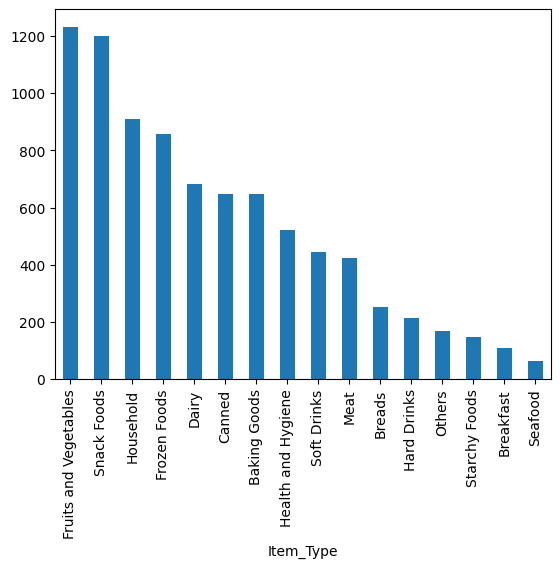

In [381]:
# Visualize the distribution of the different item types
train.Item_Type.value_counts().plot(kind='bar')

In [382]:
train['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [383]:
### Check for duplicates
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [384]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [385]:
# Checking for missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Test data

In [386]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [387]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


we have missing values in the Item_weight feature and Outlet_size feature.

In [388]:
test_data.shape

(5681, 11)

Our testing dataset has 11 features and 5681 different items/observations

### Univariate Analysis

- This focuses solely on describing and summarizing the distribution of the single variable.
- Visualize using histograms, boxplots, distribution plots, Kde plots and violin plots.

In [389]:
# Numerical columns 
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

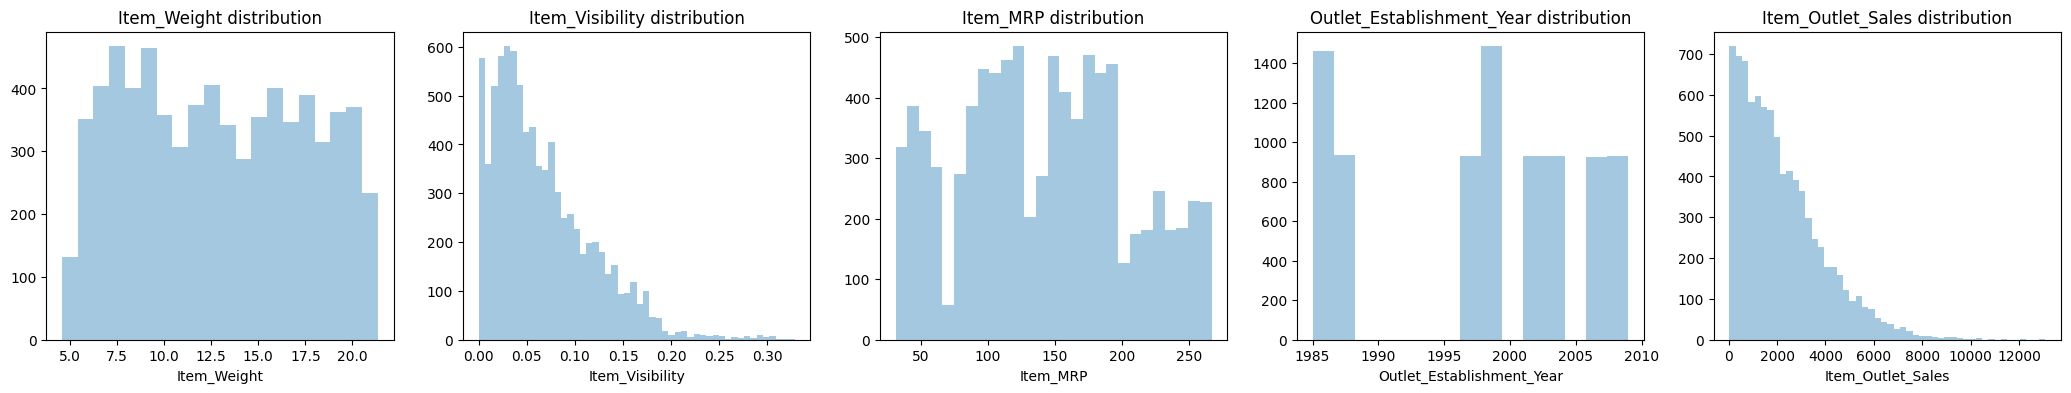

In [390]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26, 4))

for index, col in enumerate(numeric_cols):
    sns.distplot(train[col], kde=False, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

. Observations:
- Most Items weigh between 5kg and 20kg Item_Weight.
- Item_Visibility feature and Item_Outlet_sales feature are both right skewed.
- Most items retail prices range between 100 MRP - 190 MRP in the Item_MRP feature.
- A lot of stores were established in the years 1985 and 1998, while between 1988 to 1996 there were no stores established.

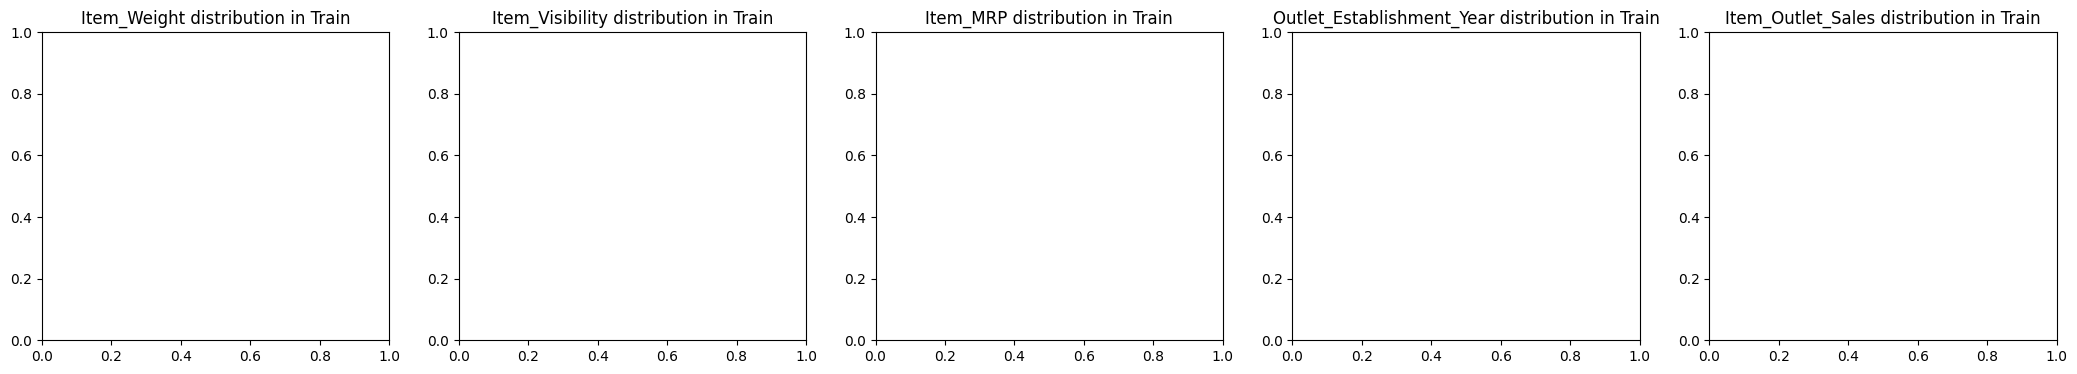

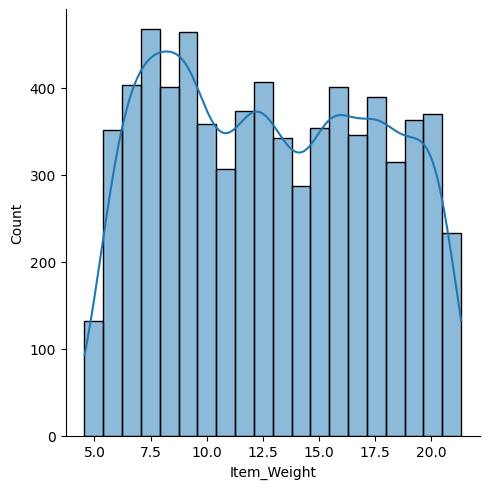

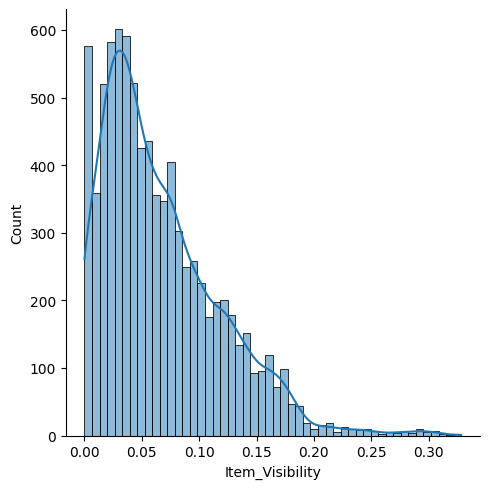

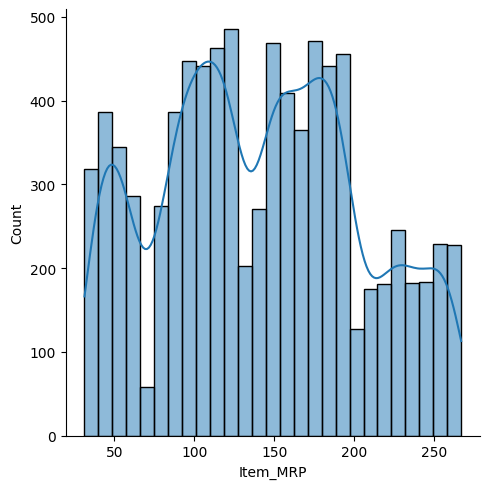

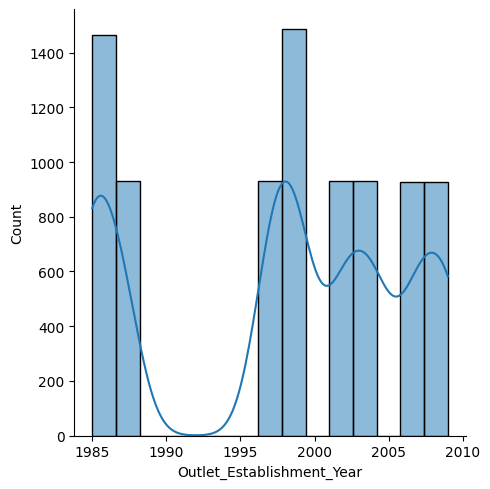

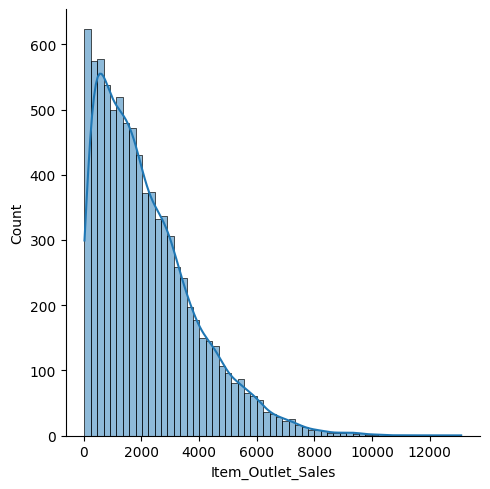

In [391]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26, 4))

for index, col in enumerate(numeric_cols):
    sns.displot(train[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Train')

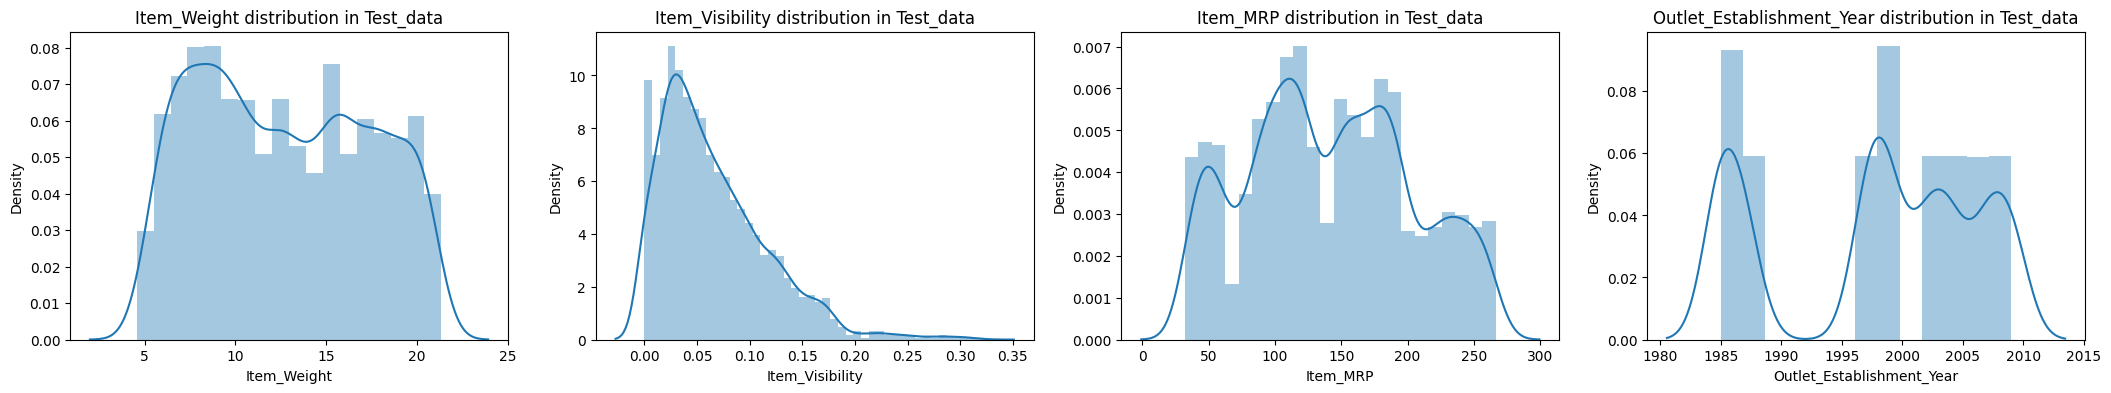

In [392]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']):
    sns.distplot(test_data[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Test_data')

Observations
- Both train and test datasets have almost similar distribution.

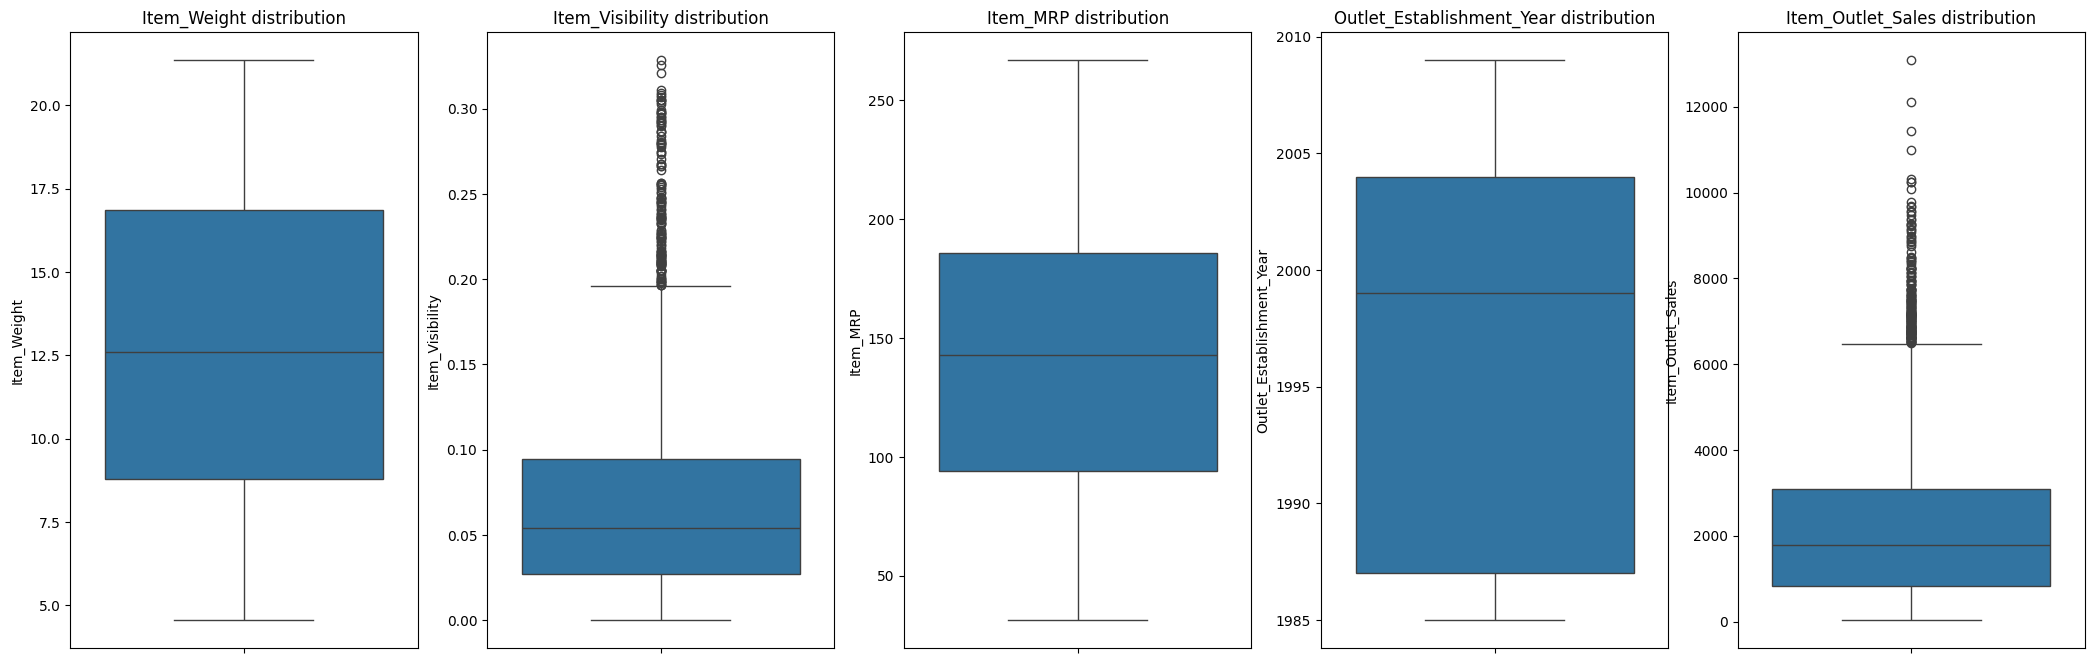

In [393]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.boxplot(data=train, y=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

- No outliers detected in the features: Item_Weight, Item_MRP and Outlet_Establishment_Year.
- However in the features Item_visibility and Item_Outlet_sales features there are some outliers detected.

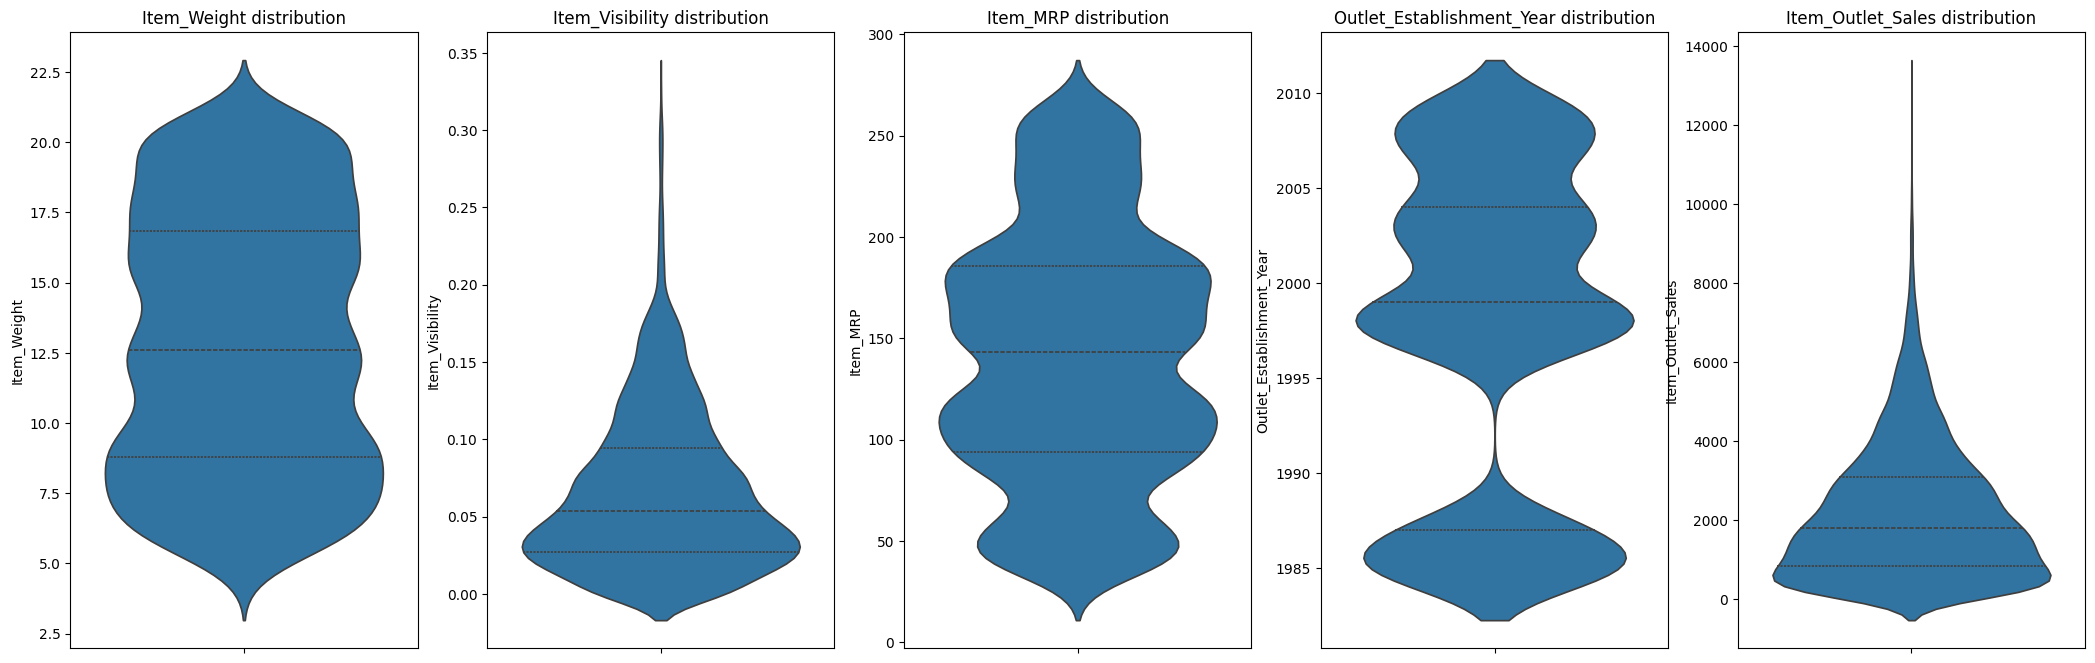

In [394]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.violinplot(data=train, y=col, ax=ax[index], inner='quartile')
    ax[index].set_title(f'{col} distribution')

- This violin plots confirm the outliers detected in the features names above i.e Item_Visibility and Item_Outlet_sales.

In [395]:
# Categorcal columns 
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [396]:
categorical_cols_to_display = [ 
                                 'Item_Fat_Content',
                                 'Item_Type',
                                 'Outlet_Size',
                                 'Outlet_Location_Type',
                                 'Outlet_Type'
                                ]
for col in categorical_cols_to_display:
    print(f"Number of values in the {col} column is:\n{train[col].value_counts() }")
    print("--" * 30)

Number of values in the Item_Fat_Content column is:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
------------------------------------------------------------
Number of values in the Item_Type column is:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
------------------------------------------------------------
Number of values in the Outlet_Size column is:
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
------------

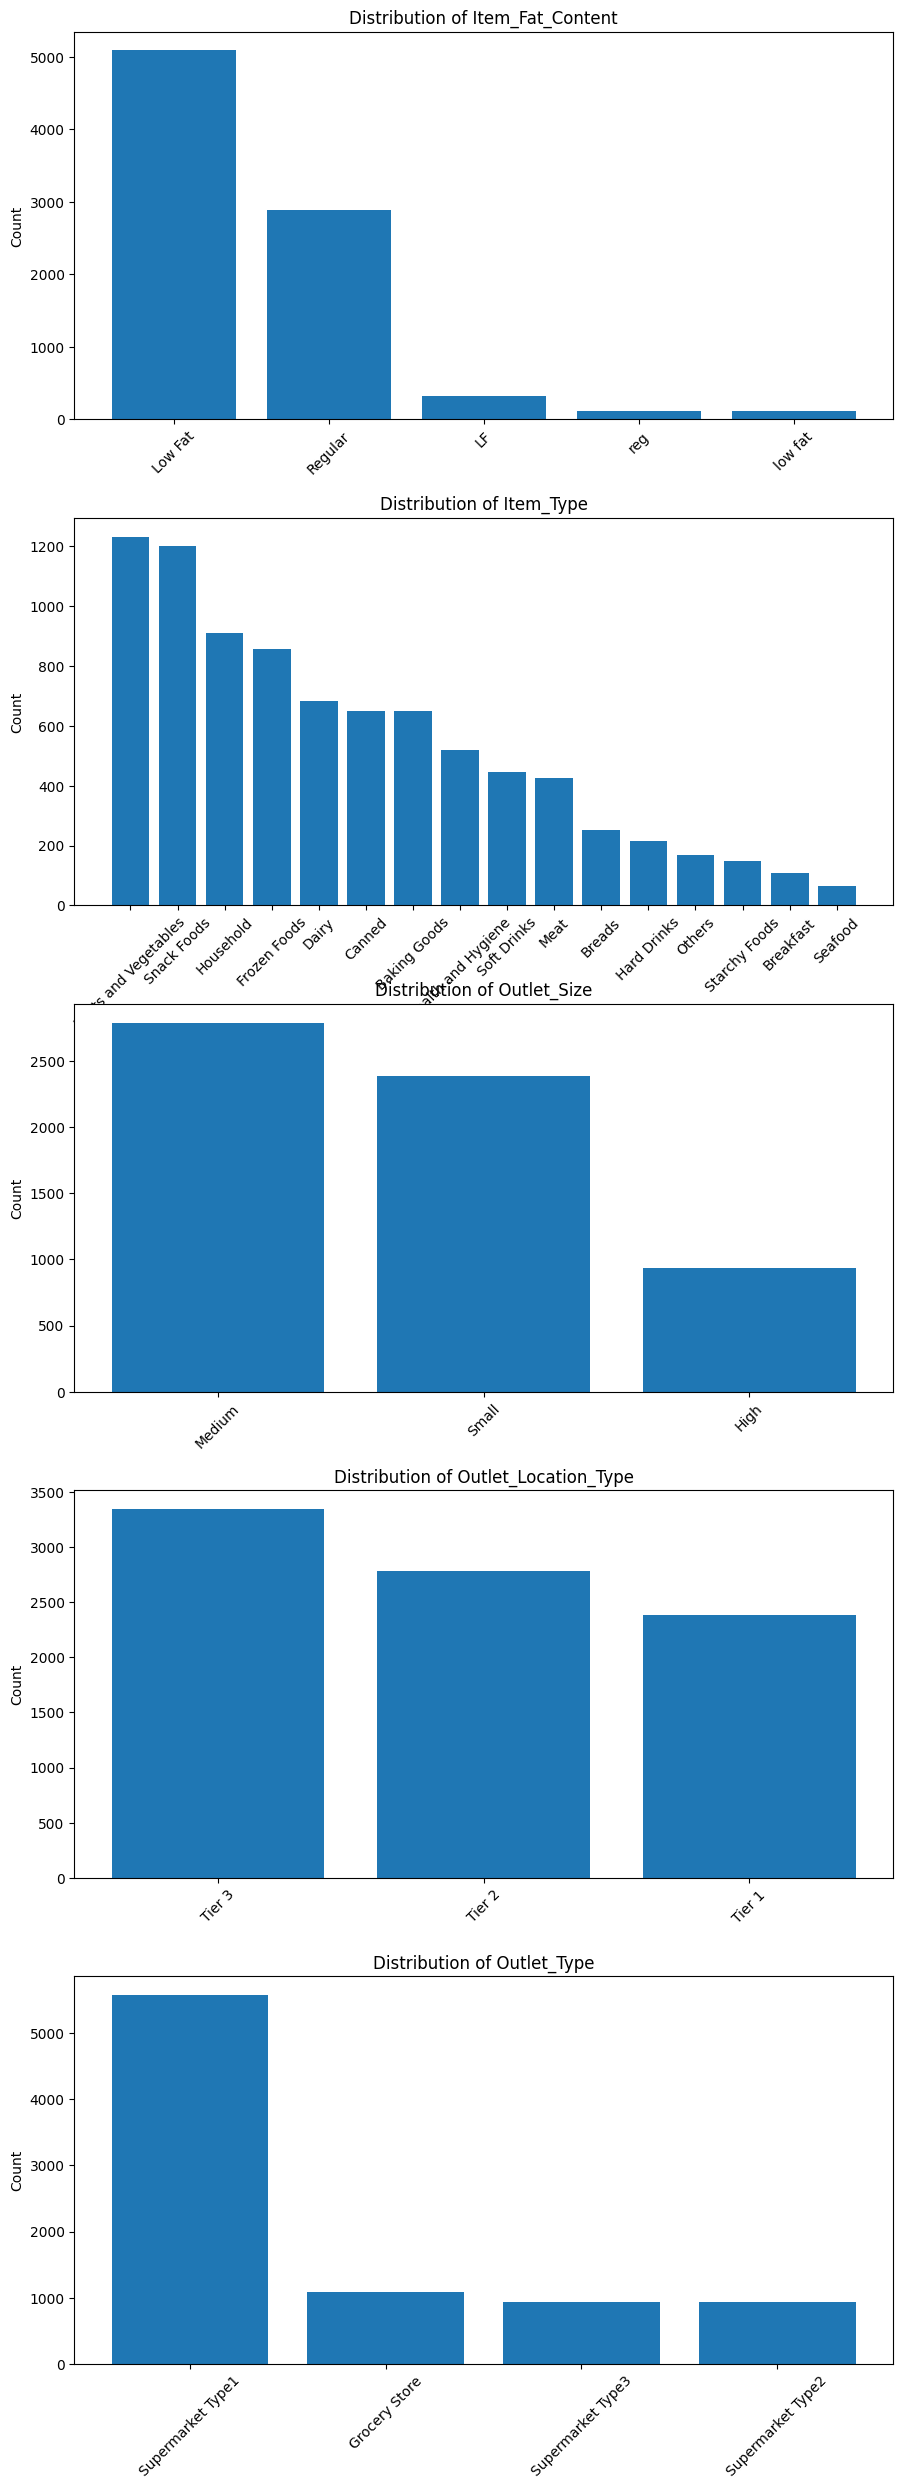

In [397]:
# Visualize the distributions
fig, axs = plt.subplots(len(categorical_cols_to_display), 1, figsize=(10, 5*len(categorical_cols_to_display)))
fig.tight_layout(pad=5.0)

for i, col in enumerate(categorical_cols_to_display):
    value_counts = train[col].value_counts()
    axs[i].bar(value_counts.index, value_counts.values)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)

plt.show()

Observations
- In the Item_Fat_Content column there are entry errors i.e 'low fat', 'Low Fat' and LF are the same and should be in the smae category as well as 'Regular' and 'reg'
- In the Item_type feature there are different categories and we should consider regrouping to reduce the categories.

### Bivariate Analysis

In [398]:
#numerical
target = 'Item_Outlet_Sales'

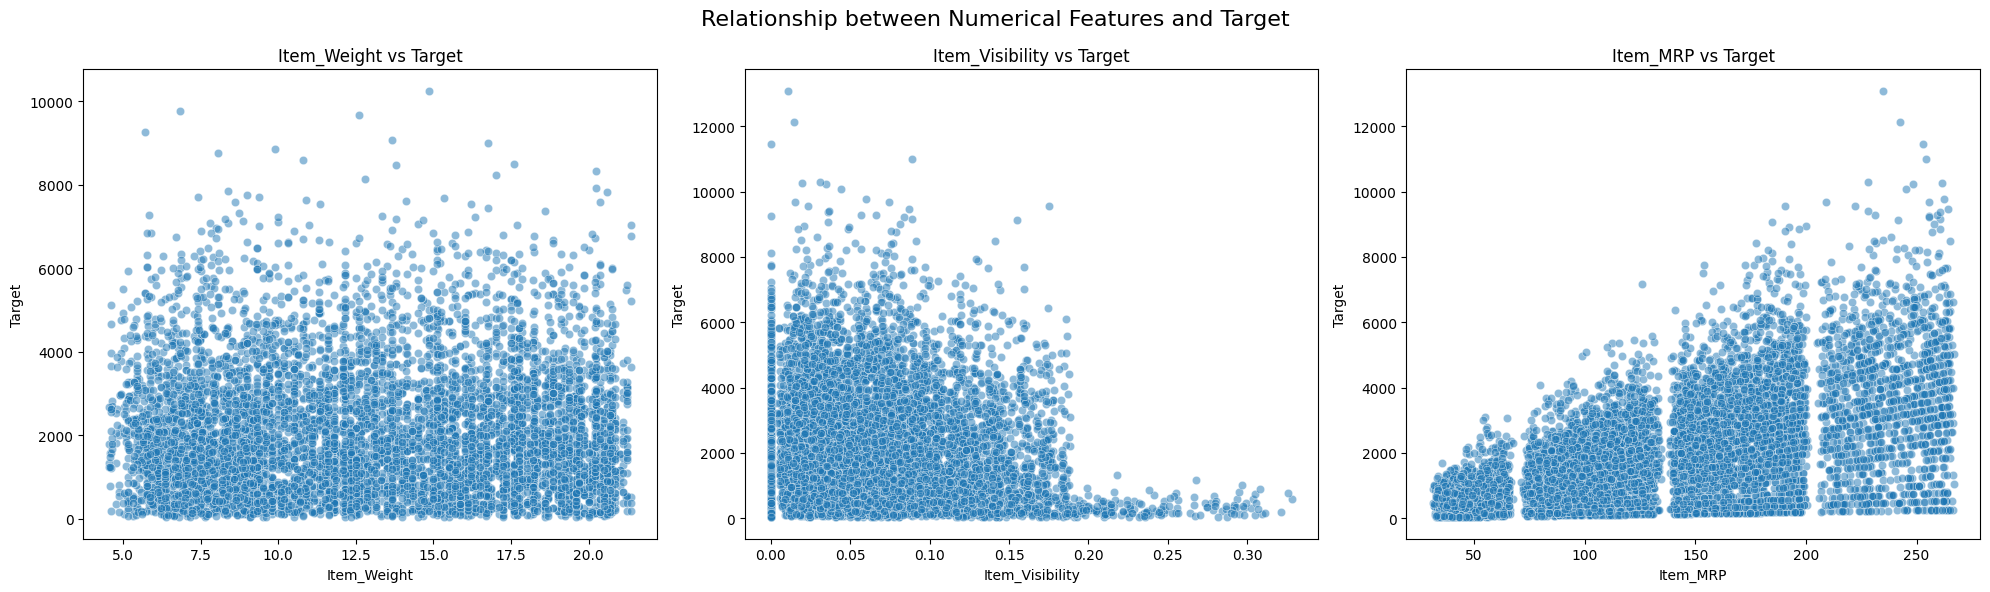

In [399]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Relationship between Numerical Features and Target', fontsize=16)

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train, x=col, y=target, ax=ax[index], alpha=0.5)
    ax[index].set_title(f'{col} vs Target')
    ax[index].set_xlabel(col)
    ax[index].set_ylabel('Target')

plt.tight_layout()
plt.show()

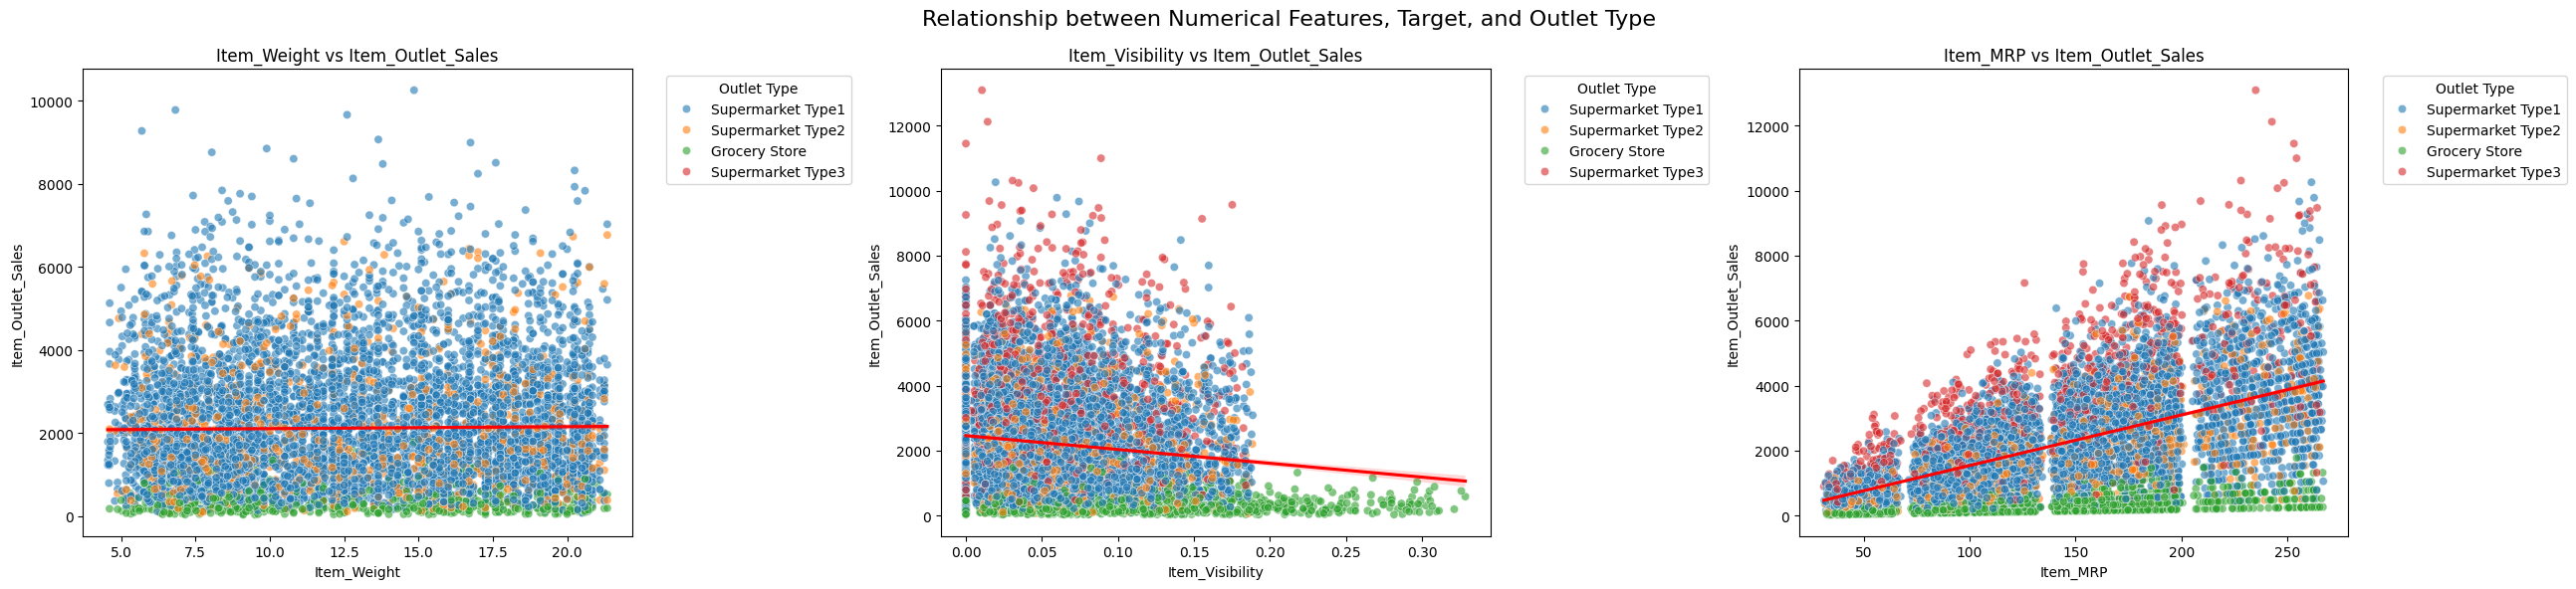

In [400]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 6))
fig.suptitle('Relationship between Numerical Features, Target, and Outlet Type', fontsize=16)

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train, x=col, y=target, ax=ax[index], hue='Outlet_Type', alpha=0.6)
    ax[index].set_title(f'{col} vs {target}')
    ax[index].set_xlabel(col)
    ax[index].set_ylabel(target)
    
    # Improve legend
    ax[index].legend(title='Outlet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add a trend line
    sns.regplot(data=train, x=col, y=target, ax=ax[index], scatter=False, color='red')

plt.tight_layout()
plt.show()

In [401]:
numeric_columns = train.select_dtypes(include=[np.number]).columns
numeric_data = train[numeric_columns]

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

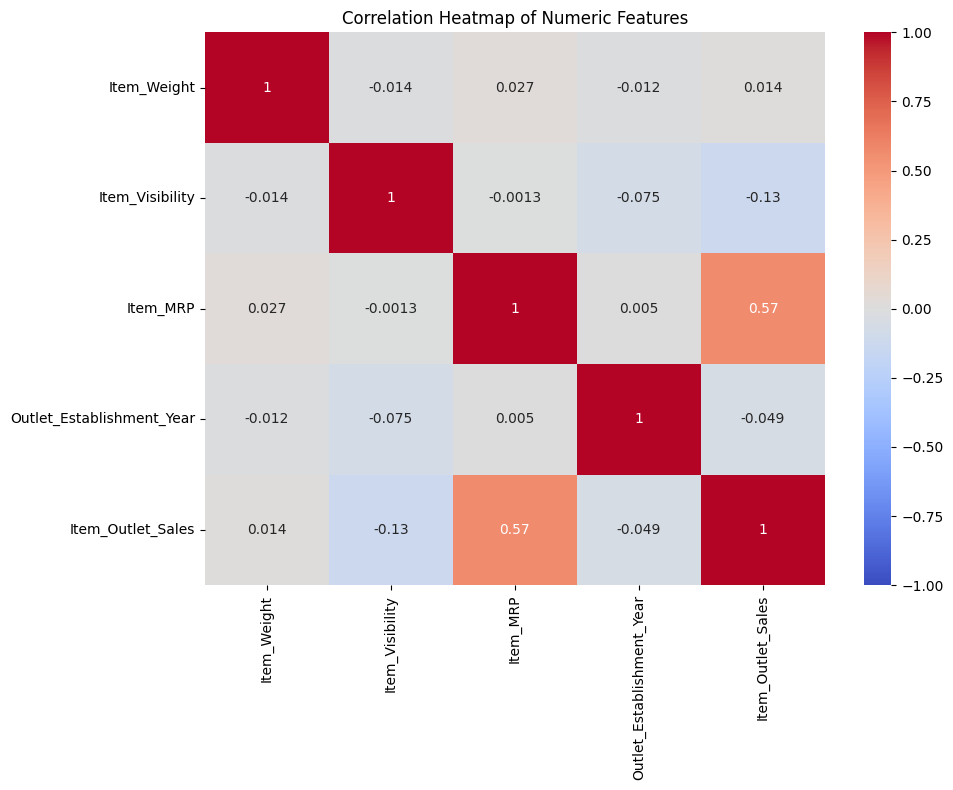

In [402]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

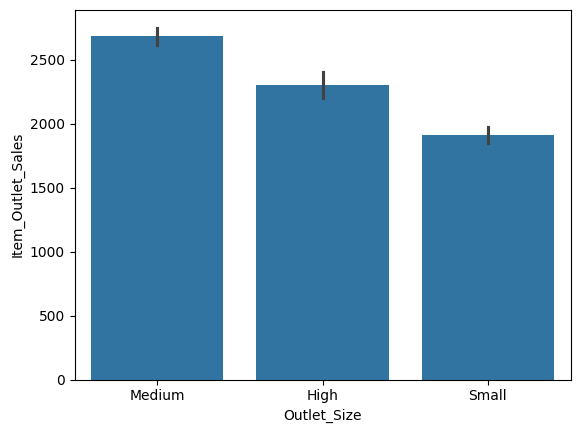

In [403]:
#Numerical-Categorical
sns.barplot(data=train, x='Outlet_Size', y=target)

In [404]:
train.Outlet_Establishment_Year

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

### Handling Missing Values

- Item_weight feature is a numerical variable and has no outliers hence we can replace the missing values using mean.
- Outlet_size feature is a categorical variable hence we shall use mode to handle missing values.

In [405]:
# for train
train['Outlet_Size'] = train.Outlet_Size.fillna(train.Outlet_Size.dropna().mode()[0]) #replace by the median after
train['Item_Weight'] = train.Item_Weight.fillna(train.Item_Weight.mean())

# for test
test_data['Outlet_Size'] = test_data.Outlet_Size.fillna(test_data.Outlet_Size.dropna().mode()[0]) #replace by the median after
test_data['Item_Weight'] = test_data.Item_Weight.fillna(test_data.Item_Weight.mean())

In [406]:
# Confirm if the missing values have been handled
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Feature Engineering

- Handle outliers in the Item_Vsibility feature

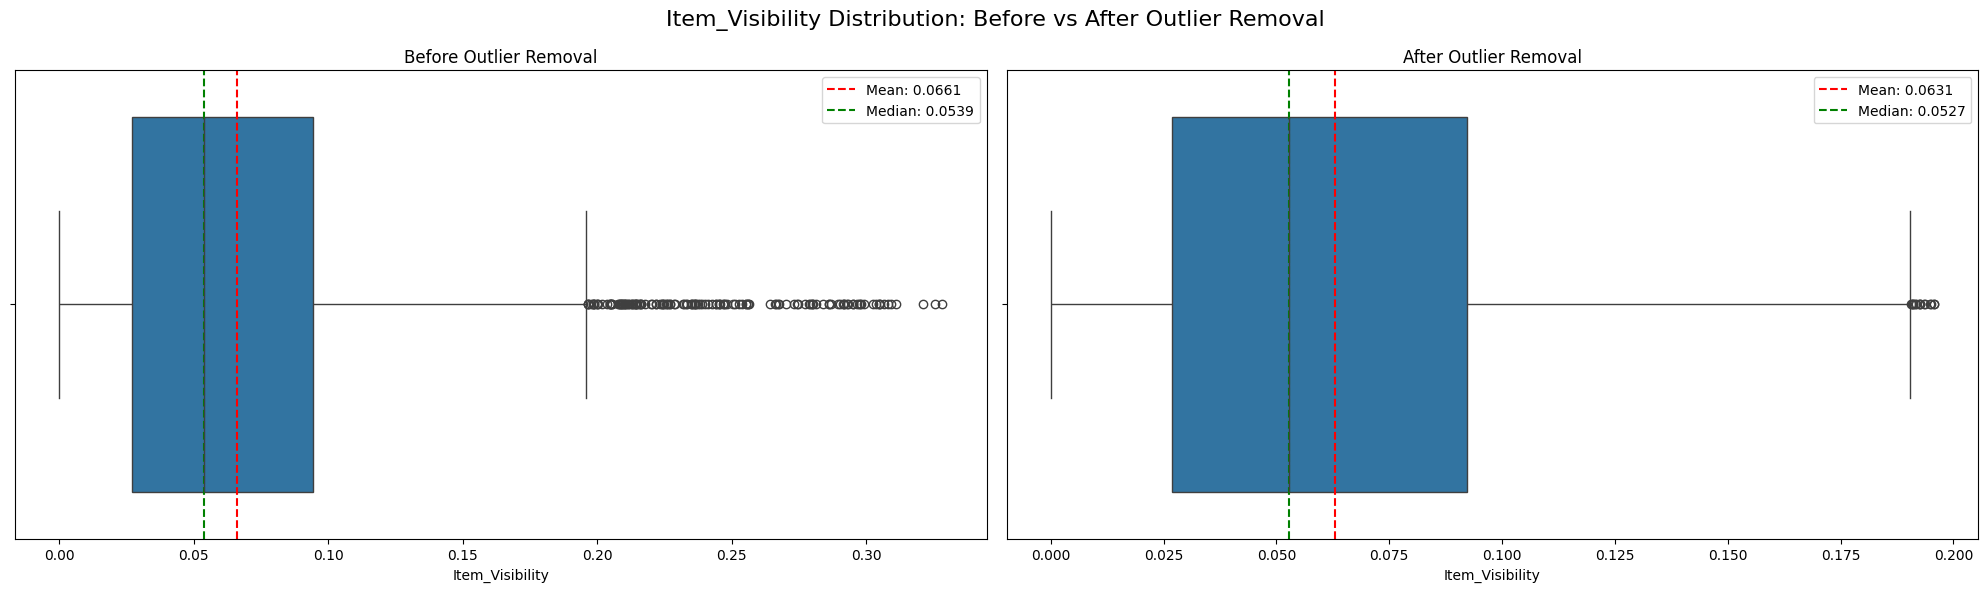

In [407]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
fig.suptitle('Item_Visibility Distribution: Before vs After Outlier Removal', fontsize=16)

# Before outlier removal
sns.boxplot(x=train['Item_Visibility'], ax=ax1)
ax1.set_title('Before Outlier Removal')
ax1.set_xlabel('Item_Visibility')

# Calculate and display statistics
before_mean = train['Item_Visibility'].mean()
before_median = train['Item_Visibility'].median()
ax1.axvline(before_mean, color='r', linestyle='--', label=f'Mean: {before_mean:.4f}')
ax1.axvline(before_median, color='g', linestyle='--', label=f'Median: {before_median:.4f}')
ax1.legend()

# Remove outliers
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

train_cleaned = train[(train['Item_Visibility'] > lower) & (train['Item_Visibility'] < upper)]
test_cleaned = test_data[(test_data['Item_Visibility'] > lower) & (test_data['Item_Visibility'] < upper)]

# After outlier removal
sns.boxplot(x=train_cleaned['Item_Visibility'], ax=ax2)
ax2.set_title('After Outlier Removal')
ax2.set_xlabel('Item_Visibility')

# Calculate and display statistics
after_mean = train_cleaned['Item_Visibility'].mean()
after_median = train_cleaned['Item_Visibility'].median()
ax2.axvline(after_mean, color='r', linestyle='--', label=f'Mean: {after_mean:.4f}')
ax2.axvline(after_median, color='g', linestyle='--', label=f'Median: {after_median:.4f}')
ax2.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


In [408]:
# Get summary statistics
print(f"Before outlier removal: {len(train)} samples")
print(f"After outlier removal: {len(train_cleaned)} samples")
print(f"Removed {len(train) - len(train_cleaned)} samples ({(len(train) - len(train_cleaned)) / len(train) * 100:.2f}% of data)")

Before outlier removal: 8523 samples
After outlier removal: 8379 samples
Removed 144 samples (1.69% of data)


- Handle outliers in the Item_Outlet_Sales feature

Upper limit: 6501.87
Lower limit: -2566.33


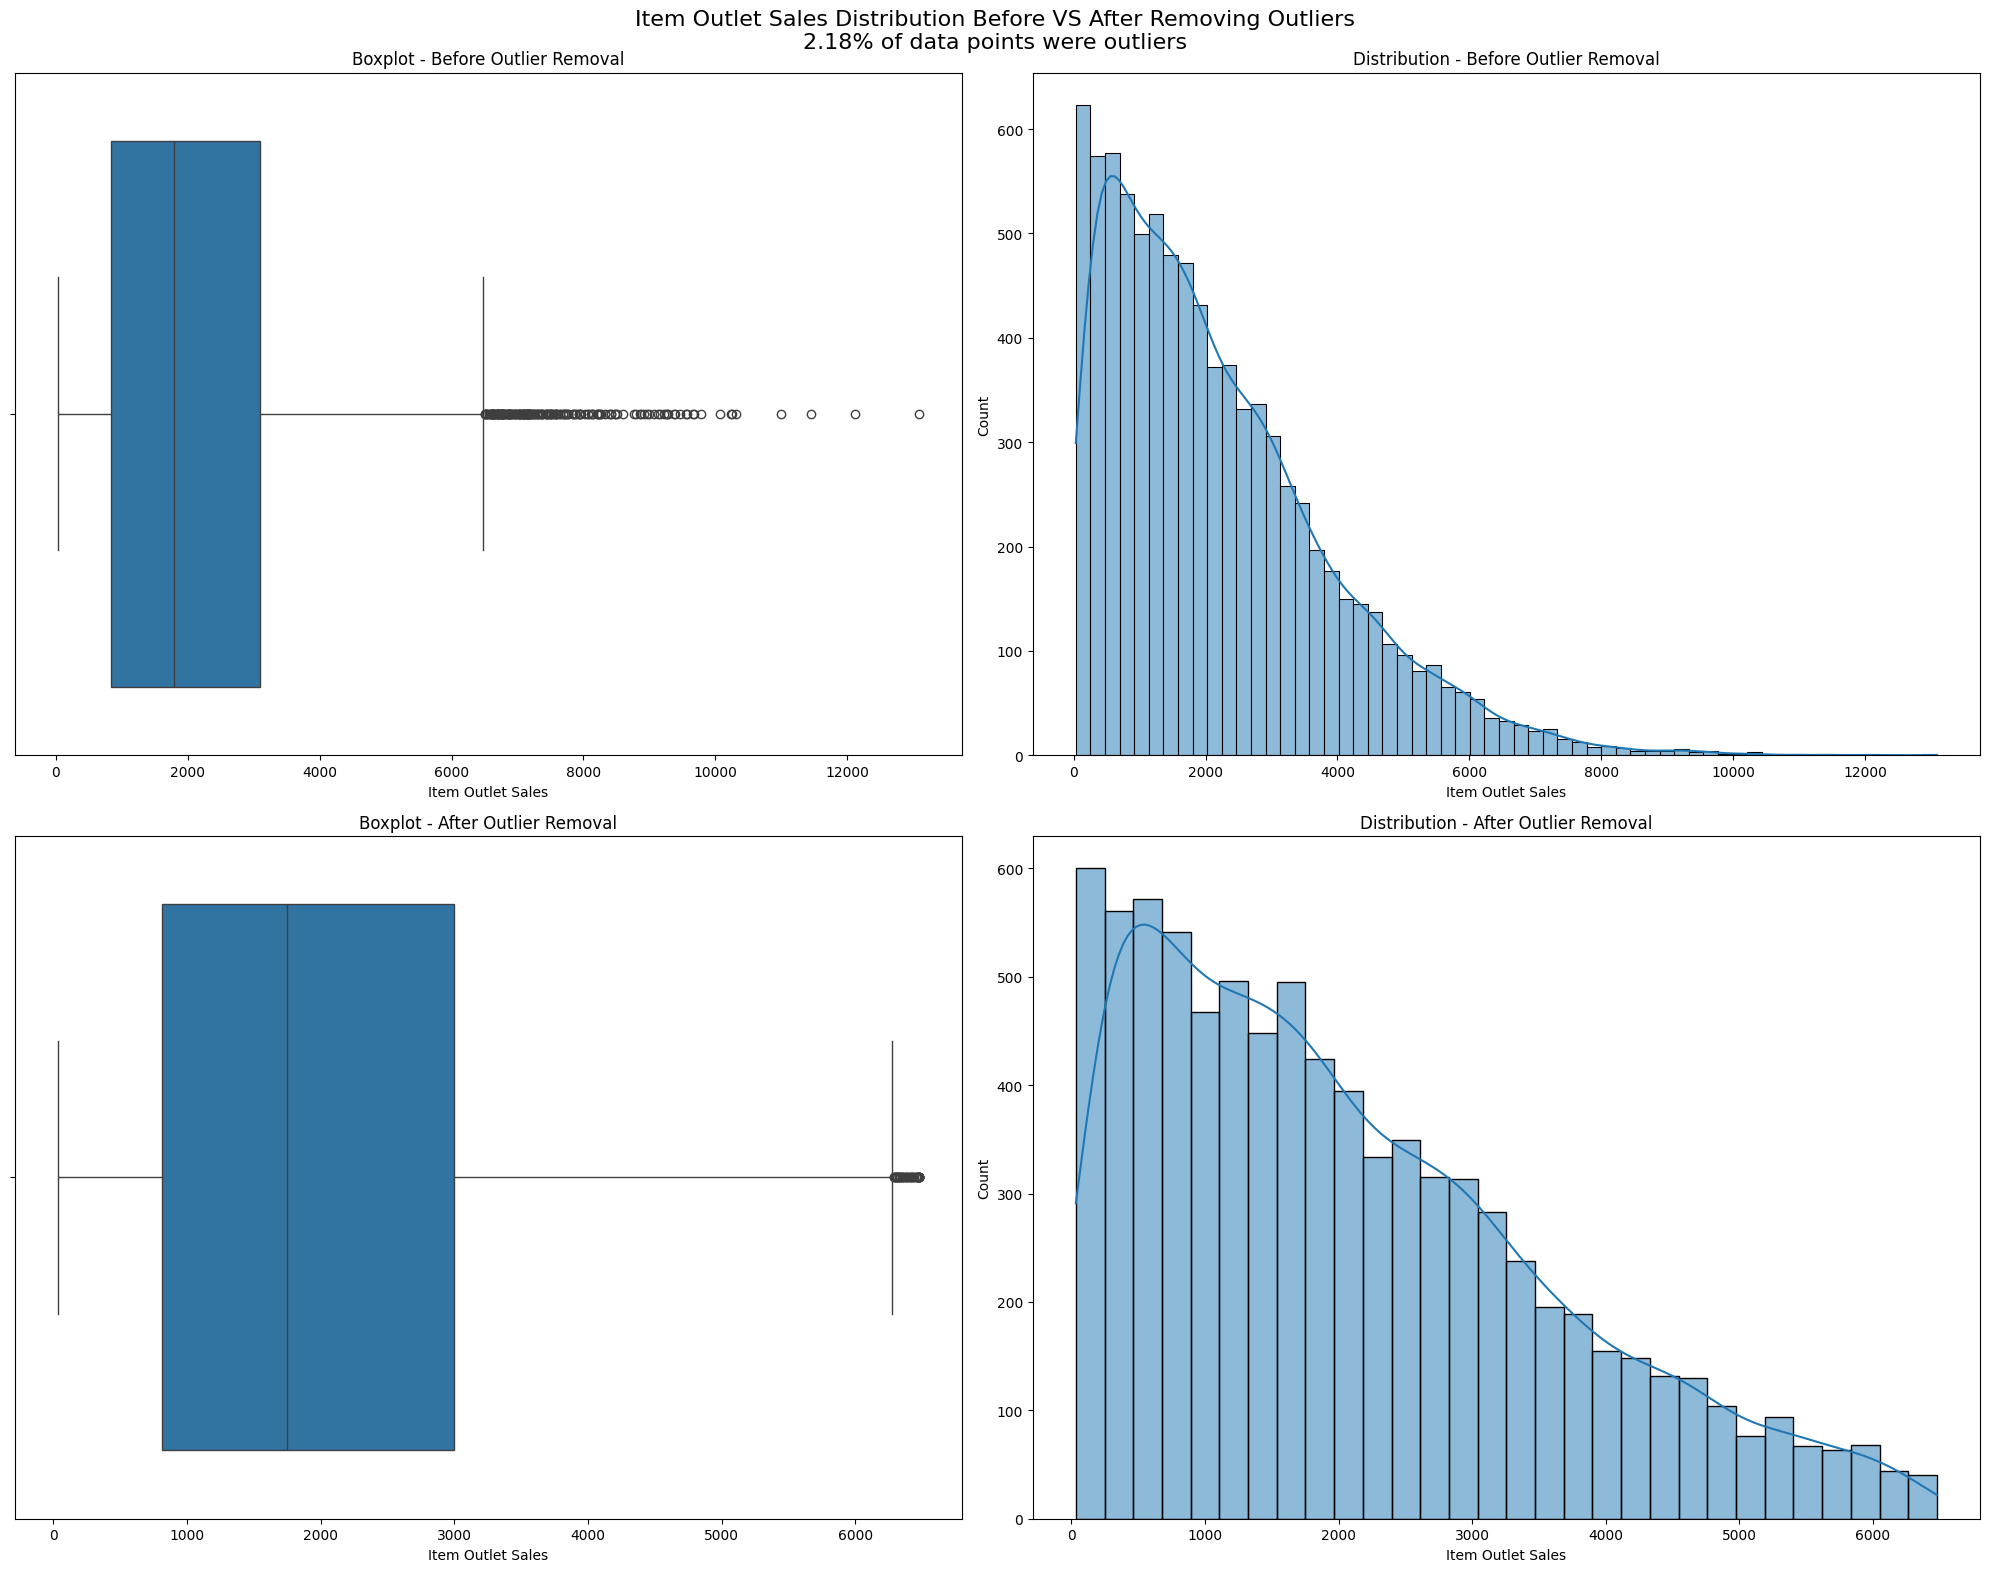

In [409]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return upper, lower

# detect outliers in the Item_Outlet_Sales feature
upper, lower = detect_outliers(train, "Item_Outlet_Sales")
print(f"Upper limit: {upper:.2f}")
print(f"Lower limit: {lower:.2f}")

_, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))

# Before outlier removal
sns.boxplot(x=train['Item_Outlet_Sales'], ax=ax[0, 0])
ax[0, 0].set_title('Boxplot - Before Outlier Removal')
ax[0, 0].set_xlabel('Item Outlet Sales')

sns.histplot(train['Item_Outlet_Sales'], kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution - Before Outlier Removal')
ax[0, 1].set_xlabel('Item Outlet Sales')

# Calculate percentage of data points that are outliers
total_points = len(train)
outliers = train[(train['Item_Outlet_Sales'] <= lower) | (train['Item_Outlet_Sales'] >= upper)]
outlier_percentage = (len(outliers) / total_points) * 100

# removing outliers
train_cleaned = train[(train['Item_Outlet_Sales'] > lower) & (train['Item_Outlet_Sales'] < upper)]

# After outlier removal
sns.boxplot(x=train_cleaned['Item_Outlet_Sales'], ax=ax[1, 0])
ax[1, 0].set_title('Boxplot - After Outlier Removal')
ax[1, 0].set_xlabel('Item Outlet Sales')

sns.histplot(train_cleaned['Item_Outlet_Sales'], kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution - After Outlier Removal')
ax[1, 1].set_xlabel('Item Outlet Sales')

plt.suptitle(f'Item Outlet Sales Distribution Before VS After Removing Outliers\n{outlier_percentage:.2f}% of data points were outliers', fontsize=16)

# Add summary statistics
stats_before = train['Item_Outlet_Sales'].describe()
stats_after = train_cleaned['Item_Outlet_Sales'].describe()

plt.tight_layout()
plt.show()

In [410]:
# Get summary statistics
print( f"Before:\nMean: {stats_before['mean']:.2f}\nMedian: {stats_before['50%']:.2f}\nStd: {stats_before['std']:.2f}")
print (f"After:\nMean: {stats_after['mean']:.2f}\nMedian: {stats_after['50%']:.2f}\nStd: {stats_after['std']:.2f}")

print(f"Removed {len(train) - len(train_cleaned)} samples ({(len(train) - len(train_cleaned)) / len(train) * 100:.2f}% of data)")

Before:
Mean: 2181.29
Median: 1794.33
Std: 1706.50
After:
Mean: 2059.36
Median: 1747.06
Std: 1506.10
Removed 186 samples (2.18% of data)


### Data Cleaning

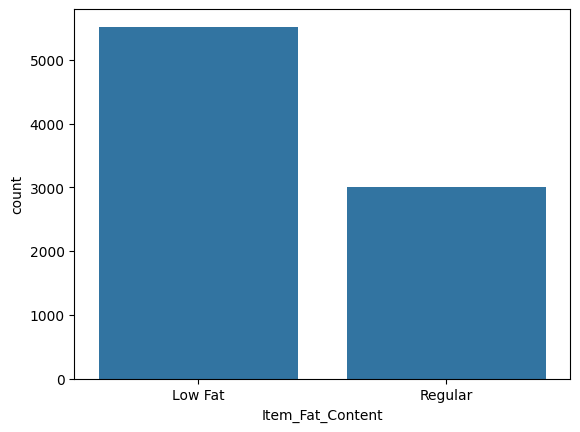

In [411]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

sns.countplot(x=train['Item_Fat_Content']);

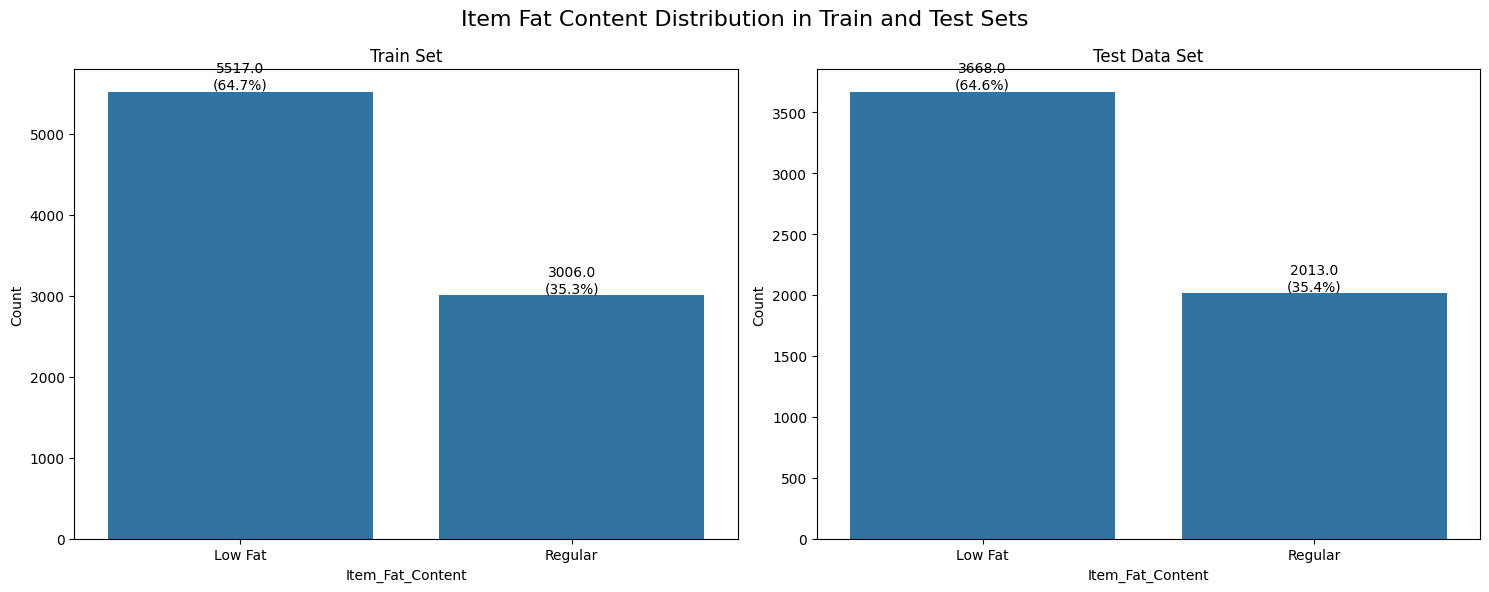

In [412]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Item Fat Content Distribution in Train and Test Sets', fontsize=16)

# Train set visualization
sns.countplot(x='Item_Fat_Content', data=train, ax=ax1)
ax1.set_title('Train Set')
ax1.set_ylabel('Count')
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height + 0.1,
             f'{height}\n({height/len(train):.1%})',
             ha="center", va="bottom")

# Test set visualization
sns.countplot(x='Item_Fat_Content', data=test_data, ax=ax2)
ax2.set_title('Test Data Set')
ax2.set_ylabel('Count')
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 0.1,
             f'{height}\n({height/len(test_data):.1%})',
             ha="center", va="bottom")

plt.tight_layout()
plt.show()


In [413]:
# Print summary statistics
print("Train set distribution:")
print(train['Item_Fat_Content'].value_counts(normalize=True))
print("\nTest Data set distribution:")
print(test_data['Item_Fat_Content'].value_counts(normalize=True))

Train set distribution:
Item_Fat_Content
Low Fat    0.647307
Regular    0.352693
Name: proportion, dtype: float64

Test Data set distribution:
Item_Fat_Content
Low Fat    0.645661
Regular    0.354339
Name: proportion, dtype: float64


In [414]:
# Check for any remaining uncategorized values
uncategorized_train = train[~train['Item_Fat_Content'].isin(['Low Fat', 'Regular'])]
uncategorized_test = test_data[~test_data['Item_Fat_Content'].isin(['Low Fat', 'Regular'])]

if not uncategorized_train.empty:
    print("\nUncategorized values in train set:")
    print(uncategorized_train['Item_Fat_Content'].value_counts())

if not uncategorized_test.empty:
    print("\nUncategorized values in test set:")
    print(uncategorized_test['Item_Fat_Content'].value_counts())

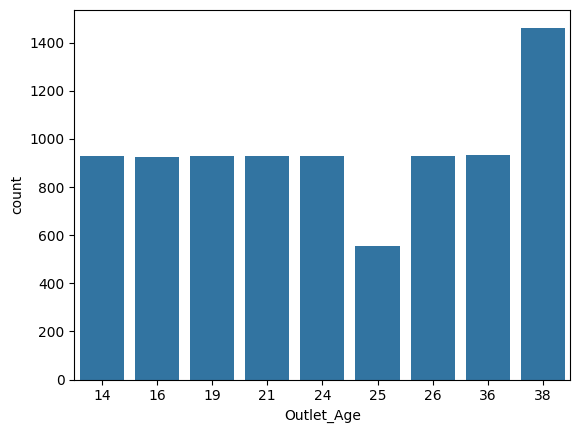

In [415]:
# getting the amount of established years in new column and delete old column
train['Outlet_Age'] = 2023 - train['Outlet_Establishment_Year']
test_data['Outlet_Age'] = 2023 - test_data['Outlet_Establishment_Year']

del train['Outlet_Establishment_Year']
del test_data['Outlet_Establishment_Year']

sns.countplot(x=train['Outlet_Age']);

### Encoding

In [416]:
label_encoder = LabelEncoder()

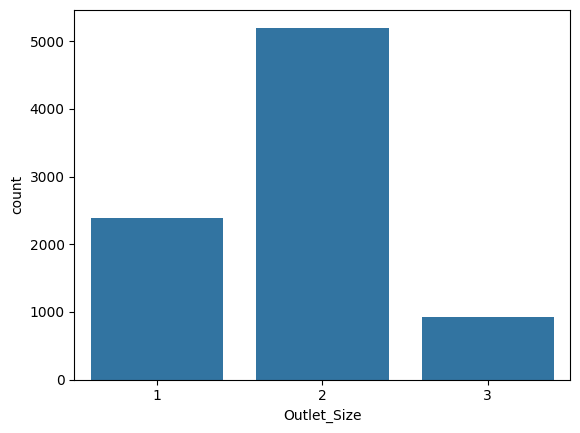

In [417]:
train['Outlet_Size'] = train['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)

test_data['Outlet_Size'] = test_data['Outlet_Size'].map({'Small'  : 1,
                                               'Medium' : 2,
                                               'High'   : 3
                                              }).astype(int)
sns.countplot(x=train['Outlet_Size']);

In [418]:
# Label encoding for Outlet_Location_Type
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].str[-1:].astype(int)
test_data['Outlet_Location_Type'] = test_data['Outlet_Location_Type'].str[-1:].astype(int)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

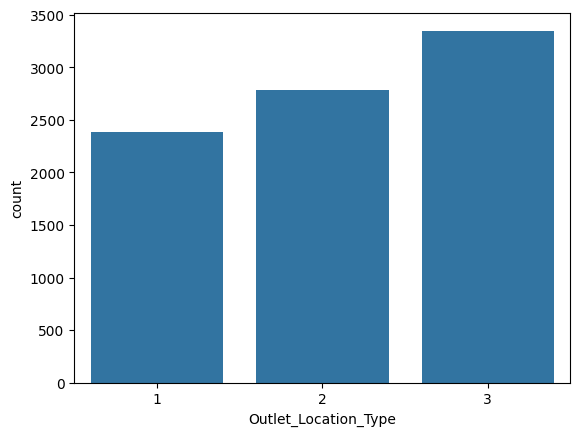

In [419]:
sns.countplot(x=train['Outlet_Location_Type'])

In [420]:
# Encoding Item_Identifier_Categories
train['Item_Identifier_Categories'] = train['Item_Identifier'].str[0:2]
test_data['Item_Identifier_Categories'] = test_data['Item_Identifier'].str[0:2]

<Axes: xlabel='Item_Identifier_Categories', ylabel='count'>

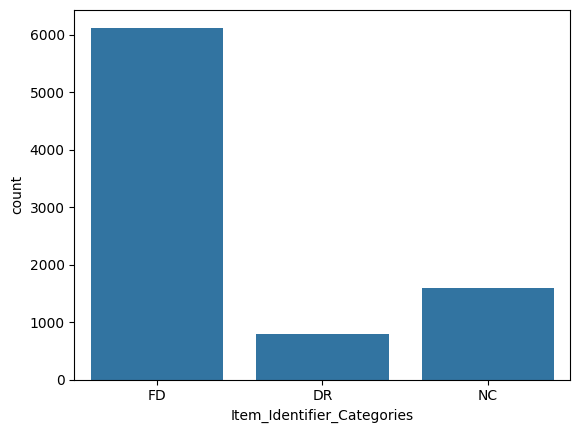

In [421]:
sns.countplot(x=train['Item_Identifier_Categories'])

In [422]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Categories
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2,1,Supermarket Type1,3735.1380,24,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,3,Supermarket Type2,443.4228,14,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2,1,Supermarket Type1,2097.2700,24,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2,3,Grocery Store,732.3800,25,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,3,3,Supermarket Type1,994.7052,36,NC


- Encode ordinal features in our data

In [423]:
# Define the ordinal features
ordinal_features = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type']

for feature in ordinal_features:
    train[feature] = label_encoder.fit_transform(train[feature])
    test_data[feature]  = label_encoder.fit_transform(test_data[feature])

train.shape

(8523, 13)

In [424]:
test_data.shape

(5681, 12)

In [425]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Categories
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,2,0,1,3735.1380,24,FD
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2,2,2,443.4228,14,DR
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,2,0,1,2097.2700,24,FD
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,2,2,0,732.3800,25,FD
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,3,2,1,994.7052,36,NC


One Hot Encoding

In [426]:
# transform the categorical features in both the training and test datasets into a numeric format

train = pd.get_dummies(train, columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)
test_data  = pd.get_dummies(test_data,  columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)


In [427]:
train.head()
train.shape


(8523, 36)

Preprocessing Data

In [433]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [434]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_Breads,Item_Type_Breakfast,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,2,0,1,24,False,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,1,0.019278,48.2692,2,2,2,14,False,False,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0,0.016760,141.6180,2,0,1,24,False,False,...,False,False,False,False,False,False,False,False,False,True
3,19.20,1,0.000000,182.0950,2,2,0,25,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.93,0,0.000000,53.8614,3,2,1,36,False,False,...,True,True,False,False,False,False,False,False,False,False


In [439]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

- Sales of each item in a particular outlet

In [436]:
from sklearn.model_selection import train_test_split

In [437]:
# splitting into training set and test set 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Modelling

In [468]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [442]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [443]:
# Predictions for LinearRegression on the test data
lin_reg_predictions = lin_reg_model.predict(X_test)

In [444]:
print('Training score  : {}'.format(lin_reg_model.score(X_train, y_train)))
print('Test score      : {}'.format(lin_reg_model.score(X_test, y_test)))

Training score  : 0.5626721183445289
Test score      : 0.5664581513105642


The linear regression model is giving us a training and testing accuracy score of 56%.

In [447]:
# Evaluation
lin_reg_mse  = mean_squared_error(y_test , lin_reg_predictions)
lin_reg_rmse = math.sqrt(lin_reg_mse)
lin_reg_r2   = r2_score(y_test, lin_reg_predictions)

print('RMSE  \t         ----> {}'.format(lin_reg_rmse))
print('R2 Score         ----> {}'.format(lin_reg_r2))

RMSE  	         ----> 1136.1814186674026
R2 Score         ----> 0.5664581513105642


- Add polynomial features to see how good the linear regression model performs and also standardoze our data.

In [458]:
steps = [
    ('scaler', StandardScaler()),
    ('poly',   PolynomialFeatures(degree=2)),
    ('model',  LinearRegression())
       ]

lin_reg_pipeline = Pipeline(steps)

lin_reg_pipeline.fit(X_train, y_train)

print('Training score  : {}'.format(lin_reg_pipeline.score(X_train, y_train)))
print('Test score      : {}'.format(lin_reg_pipeline.score(X_test, y_test)))

Training score  : 0.6215805765254228
Test score      : 0.589197377239906


The training score is better  with 62% but the test score is 58% which tells us that the models are stating to overfit the data.

Ridge regression
- Ridge regression adds a penalty to the update, and as a result shrinks the size of our weights.
- The larger the value of alpha, the less variance your model will exhibit

In [461]:
steps = [
            ('scaler', StandardScaler()),
            ('poly'  , PolynomialFeatures(degree=2)),
            ('model' , Ridge(alpha=7, fit_intercept=True))
       ]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training Score  : {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test Score      : {}'.format(ridge_pipeline.score(X_test, y_test)))

Training Score  : 0.6215828435931566
Test Score      : 0.5892232045383268


In [462]:
# Predictions for Ridge on the test data
ridge_predictions = ridge_pipeline.predict(X_test)

In [463]:
# Evaluate 
ridge_mse  = mean_squared_error(y_test , ridge_predictions)
ridge_rmse = math.sqrt(ridge_mse)
ridge_r2   = r2_score(y_test, ridge_predictions)

print('Ridge RMSE  \t         ----> {}'.format(ridge_rmse))
print('Ridge R2 Score         ----> {}'.format(ridge_r2))

Ridge RMSE  	         ----> 1105.9490532112243
Ridge R2 Score         ----> 0.5892232045383268


Lasso Regression 
- Which of our features are relevant to our model, and which are not?
- L1 regularization tries to answer this question by driving the values of certain coefficients down to 0. 
- This eliminates the least important features in our model.
- Using Lasso we will create a pipeline similar to ridge but alpha will rabge from 0.1 to 1

In [465]:
steps = [
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model', Lasso(alpha=0.2, fit_intercept=True))
        ]

lasso_pipeline = Pipeline(steps)

lasso_pipeline.fit(X_train, y_train)

print('Training score  : {}'    .format(lasso_pipeline.score(X_train, y_train)))
print('Test score      : {}'    .format(lasso_pipeline.score(X_test, y_test)))

Training score  : 0.621561672304551
Test score      : 0.5895866491435591


In [466]:
# Predictions for Lasso on the test set
lasso_predictions = lasso_pipeline.predict(X_test)

In [467]:
# Evaluate the model
lasso_mse  = mean_squared_error(y_test , lasso_predictions)
lasso_rmse = math.sqrt(lasso_mse)
lasso_r2   = r2_score(y_test, lasso_predictions)

print('Lasso RMSE  \t         ----> {}'.format(lasso_rmse))
print('Lasso R2 Score         ----> {}'.format(lasso_r2))

Lasso RMSE  	         ----> 1105.4596874901833
Lasso R2 Score         ----> 0.5895866491435591


Ridge and Lasso are a better model compared to linear regression

In [469]:
rand_forest_model = RandomForestRegressor()
rand_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [470]:
# Predictions for XGBoost on the test data
rand_forest_predictions = rand_forest_model.predict(X_test)

In [471]:
print('Training score  : {}'.format(rand_forest_model.score(X_train, y_train)))
print('Test score      : {}'.format(rand_forest_model.score(X_test, y_test)))

Training score  : 0.9381536717356088
Test score      : 0.5612726300609914


Random forest is overfitting the data.

In [472]:
# Evaluation
rand_forest_mse = mean_squared_error(y_test , rand_forest_predictions)
rand_forest_rmse = math.sqrt(rand_forest_mse)
rand_forest_r2 = r2_score(y_test, rand_forest_predictions)

print('RandomForest RMSE  \t       ----> {}'.format(rand_forest_rmse))
print('RandomForest R2 Score       ----> {}'.format(rand_forest_r2))

RandomForest RMSE  	       ----> 1142.956058876335
RandomForest R2 Score       ----> 0.5612726300609914


In [476]:
from xgboost import XGBRegressor

In [477]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [478]:
xgb_predictions = xgb_model.predict(X_test)

In [479]:
print('XGBoost Training score  : {}'.format(xgb_model.score(X_train, y_train)))
print('XGBoost Test score      : {}'.format(xgb_model.score(X_test, y_test)))

XGBoost Training score  : 0.8722643814085345
XGBoost Test score      : 0.5199739166451248


In [480]:
# Evaluation
xgb_mse = mean_squared_error(y_test , xgb_predictions)
xgb_rmse = math.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print('XGBoost RMSE  \t   ----> {}'.format(xgb_rmse))
print('XGBoost R2 Score   ----> {}'.format(xgb_r2))

XGBoost RMSE  	   ----> 1195.5413128567454
XGBoost R2 Score   ----> 0.5199739166451248


In [481]:
best_model = min(results, key=lambda x: results[x]['Test MAE'])
print(f"\nBest Model: {best_model}")

NameError: name 'results' is not defined